<a href="https://colab.research.google.com/github/yasarsabir/Project-4/blob/main/Student_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
# Import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

In [26]:
#
'''import csv_to_sqlite

# all the usual options are supported
options = csv_to_sqlite.CsvOptions(typing_style="full")#, encoding="windows-1250")
input_files = ["datacleaned.csv"] # pass in a list of CSV files
csv_to_sqlite.write_csv(input_files, "students.sqlite", options)'''




Written 3630 rows into 1 tables in 0.371 seconds


3630

---

### Demonstrate that the model utilizes data retrieved from SQL or Spark

In [31]:
import sqlite3
con = sqlite3.connect("students.sqlite")
cur = con.cursor()
sqlresult= cur.execute("SELECT * FROM 'datacleaned'").fetchall()

Headers = ['Marital status','Course','Day_evening attendance','Previous qualification','Nationality','Mothers qualification','Fathers qualification','Mothers occupation','Fathers occupation','Displaced','Educational special needs','Debtor','Tuition fees up to date','Gender','Scholarship holder','Age at enrollment','International','Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)','Curricular units 2nd sem (without evaluations)','Unemployment rate','Inflation rate','GDP','Target']
student_data_df = pd.DataFrame(sqlresult, columns = Headers)
student_data_df.head()

,Marital status,Course,Day_evening attendance,Previous qualification,Nationality,Mothers qualification,Fathers qualification,Mothers occupation,Fathers occupation,Displaced,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,2,1,1,1,13,10,6,10,1,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,11,1,1,1,1,3,4,4,1,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,5,1,1,1,22,27,10,10,1,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,15,1,1,1,23,27,6,4,1,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,3,0,1,1,22,28,10,10,0,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Split the Data into Training and Testing Sets

### Step 1: Read the `student_data.csv` data from the folder into a Pandas DataFrame.

In [32]:
'''#Read the CSV file from the Resources folder into a Pandas DataFrame
student_data_df = pd.read_csv(
    Path("datacleaned.csv")
)

# Review the DataFrame
student_data_df.head()'''

'#Read the CSV file from the Resources folder into a Pandas DataFrame\nstudent_data_df = pd.read_csv(\n    Path("datacleaned.csv")\n)\n\n# Review the DataFrame\nstudent_data_df.head()'

In [33]:
student_data_df=student_data_df.replace({'Target' : { 'Graduate' : 0, 'Dropout' : 1}})
student_data_df.head()

,Marital status,Course,Day_evening attendance,Previous qualification,Nationality,Mothers qualification,Fathers qualification,Mothers occupation,Fathers occupation,Displaced,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,2,1,1,1,13,10,6,10,1,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,11,1,1,1,1,3,4,4,1,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,5,1,1,1,22,27,10,10,1,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,15,1,1,1,23,27,6,4,1,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,3,0,1,1,22,28,10,10,0,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


### Step 2: Create the labels set (`y`)  from the “Target” column, and then create the features (`X`) DataFrame from the remaining columns.

In [34]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = student_data_df['Target']


# Separate the X variable, the features
X = student_data_df.drop(columns=['Target'])

In [35]:
# Review the y variable Series
#y[:5]

display(y.head())
display(y.tail())

0    1
1    0
2    1
3    0
4    0
Name: Target, dtype: int64

3625    0
3626    1
3627    1
3628    0
3629    0
Name: Target, dtype: int64

In [36]:
# Review the X variable DataFrame
X[:5]


,Marital status,Course,Day_evening attendance,Previous qualification,Nationality,Mothers qualification,Fathers qualification,Mothers occupation,Fathers occupation,Displaced,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,2,1,1,1,13,10,6,10,1,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,11,1,1,1,1,3,4,4,1,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,5,1,1,1,22,27,10,10,1,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,15,1,1,1,23,27,6,4,1,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,3,0,1,1,22,28,10,10,0,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [37]:
# Check the balance of our target values

y.value_counts()
# therefore 2209 Graduates, 1421 dropouts, as you can see data is slightly imabalanced

0    2209
1    1421
Name: Target, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [38]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=1,
                                                    stratify=y,
                                                    test_size= 0.25)

#the default is 75% to train, 25% to test, specify the amount you wish to test


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [39]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

# Fit the model using training data
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [40]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
3104,1,1
1581,0,0
2143,0,0
2515,0,0
1849,0,0
...,...,...
338,0,0
3376,0,0
3526,1,1
2972,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [41]:
# Print the balanced_accuracy score of the model
from sklearn.metrics import accuracy_score
balanced_accuracy_score(y_test, predictions)

0.9096859638845732

In [42]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[531,  22],
       [ 50, 305]])

In [43]:
# Print the classification report for the model
from sklearn.metrics import classification_report
target_names = ["Graduate", "Dropout"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

    Graduate       0.91      0.96      0.94       553
     Dropout       0.93      0.86      0.89       355

    accuracy                           0.92       908
   macro avg       0.92      0.91      0.92       908
weighted avg       0.92      0.92      0.92       908



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (Graduate) and `1` (Dropout) labels?

**Answer:**Excellent at predicting Graduates (96% recall), but not as good for dropouts(86%).

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: We used the `RandomOverSampler` module from the imbalanced-learn library to resample the data, thus ensuring that both our labels of graduate vs dropout had an equal number of data points.

In [44]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
oversample = RandomOverSampler(sampling_strategy='minority')

# Fit the original training data to the random_oversampler model
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [45]:
# Count the distinct values of the resampled labels data
y_over.value_counts()


0    1656
1    1656
Name: Target, dtype: int64

In [46]:
# so now we have taken equal number of samples from both healthy and high risk loans

In [47]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model

classifier_rebalanced = LogisticRegression(solver='lbfgs', random_state=1)


# Fit the model using the resampled training data
classifier_rebalanced.fit(X_over, y_over)

# Make a prediction using the testing data

predictions_rebalanced = classifier_rebalanced.predict(X_test)
pd.DataFrame({"Prediction": predictions_rebalanced, "Actual": y_test})





/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Prediction,Actual
3104,1,1
1581,0,0
2143,0,0
2515,0,0
1849,0,0
...,...,...
338,0,0
3376,0,0
3526,1,1
2972,0,0


### Step 2: We usd the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [48]:
# Print the balanced_accuracy score of the model
from sklearn.metrics import accuracy_score
balanced_accuracy_score(y_test, predictions_rebalanced)

0.9110078190662965

In [49]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions_rebalanced)

array([[520,  33],
       [ 42, 313]])

In [50]:
# Print the classification report for the model

from sklearn.metrics import classification_report
target_names = ["Graduate", "Dropout"]
print(classification_report(y_test, predictions_rebalanced, target_names=target_names))

              precision    recall  f1-score   support

    Graduate       0.93      0.94      0.93       553
     Dropout       0.90      0.88      0.89       355

    accuracy                           0.92       908
   macro avg       0.91      0.91      0.91       908
weighted avg       0.92      0.92      0.92       908



### Step 4: We answered the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (graduate) and `1` (dropout) labels?

**Answer:** When using the oversampled data of the dropouts, the overall accuracy has remianed the same at 92%, however the recall for the dropout label has increased from 86% to 88% a.

Use Random Forest to determine which Features are important in the model.

In [52]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_over, y_over)

RandomForestClassifier(random_state=0)

In [60]:
X.columns

Index(['Marital status', 'Course', 'Day_evening attendance',
       'Previous qualification', 'Nationality', 'Mothers qualification',
       'Fathers qualification', 'Mothers occupation', 'Fathers occupation',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 

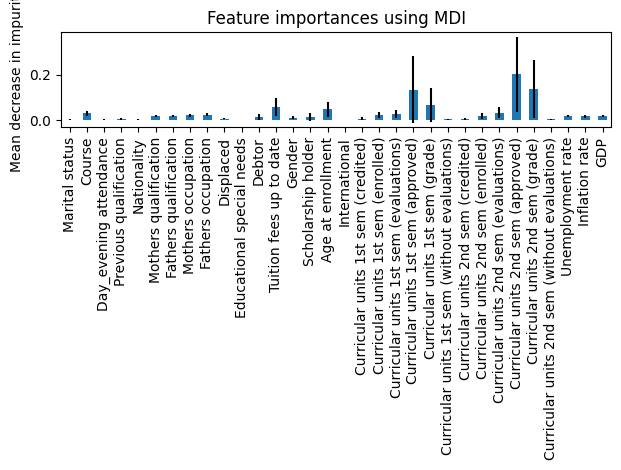

In [61]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Remove all the curricular units from the dataset and retrain the model to determine whether accuracy improves.

#we are usign random forest to bring in the important feature, so things which we think are important can be removed and we can retrain the model. Only remove one at a time. Those features with the  
#after this bring in the deep learning code.

We retrained the model using a test/train split of 80/20 and the RandomOverSample module.

Feature 26